### Metadata

* Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
* Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
* Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker.
* This pixel-value is an integer between 0 and 255. 
* The training and test data sets have 785 columns.
* The first column consists of the class labels (see above), and represents the article of clothing.
* The rest of the columns contain the pixel-values of the associated image.

Q1- Use the Fashion MNIST data set and train a basic autoencoder to reconstruct images.

Train the model using x_train as both the input and the target. The encoder should learn to compress the dataset from 784 dimensions to the latent space, and the decoder should learn to reconstruct the original images.

Let the autoencoder have two Dense layers: 

a. an encoder, which compresses the images into a 64 dimensional latent 
vector, use reLU as activation function.

b. and a decoder, that reconstructs the original image from the latent space,use sigmoid as activation function.

Once the model is trained for at least 10 epochs , with loss function as mean square 
error, test it by encoding and decoding images from the test set. Display original and 
reconstructed images

In [1]:
#importing libraries for visualization
import matplotlib.pyplot as plt

#importing libraries for data cleaning,analysis and computations
import numpy as np
import pandas as pd

#importing libraries for model training
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

#importing libraries for statistical tools
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [2]:
#loading the dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

#normalizing the data
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

#printing the shape of the normalized data
print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 
#defining the autoencoder function
class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    #Encoder
    self.encoder = tf.keras.Sequential([layers.Flatten(),layers.Dense(latent_dim, activation='relu'),])
    #Decoder
    self.decoder = tf.keras.Sequential([layers.Dense(784, activation='sigmoid'),layers.Reshape((28, 28))])
  #Defining the call function
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [4]:
#compiling the model
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
#fitting the data to the model
history=autoencoder.fit(x_train, x_train,epochs=10,shuffle=True,validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 12s 4ms/step - loss: 0.0236 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.00

Since we have trained the model, we will test it by encoding and decoding images from the test set.

In [6]:
#Testing the built model
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

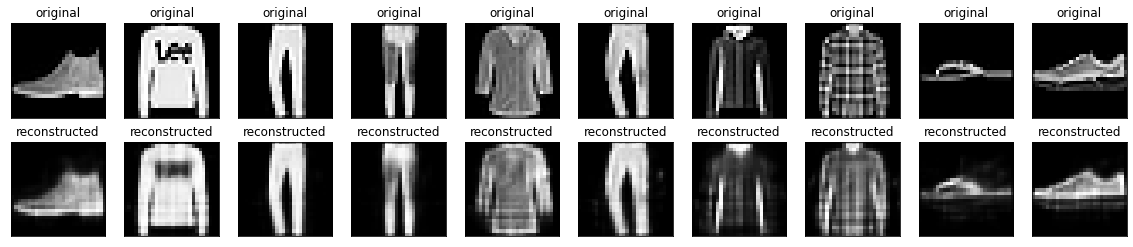

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display the original images
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display the reconstructed images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()